# GRU (Gated Recurrent Unit)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.layers import GRU, Bidirectional, Dense, Input
from keras.losses import MeanSquaredError
from keras.metrics import R2Score
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
sequence = [*range(2, 201, 2)]
sequence_length = 5

In [3]:
def prepare_data(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


X, y = prepare_data(sequence, sequence_length)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
X_train.shape

(76, 5)

In [6]:
X_test.shape

(19, 5)

In [7]:
y_train.shape

(76,)

In [8]:
y_test.shape

(19,)

In [9]:
gru = Sequential(
    layers=[
        Input(shape=(sequence_length, 1)),
        Bidirectional(GRU(64, return_sequences=True)),
        Bidirectional(GRU(64)),
        Dense(64),
        Dense(32),
        Dense(1),
    ],
    name="gru",
)

In [10]:
gru.layers

[<Bidirectional name=bidirectional, built=True>,
 <Bidirectional name=bidirectional_1, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [11]:
gru.summary()

Model: "gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,593 (432.00 KB)

 Trainable params: 110,593 (432.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
gru.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[R2Score()])

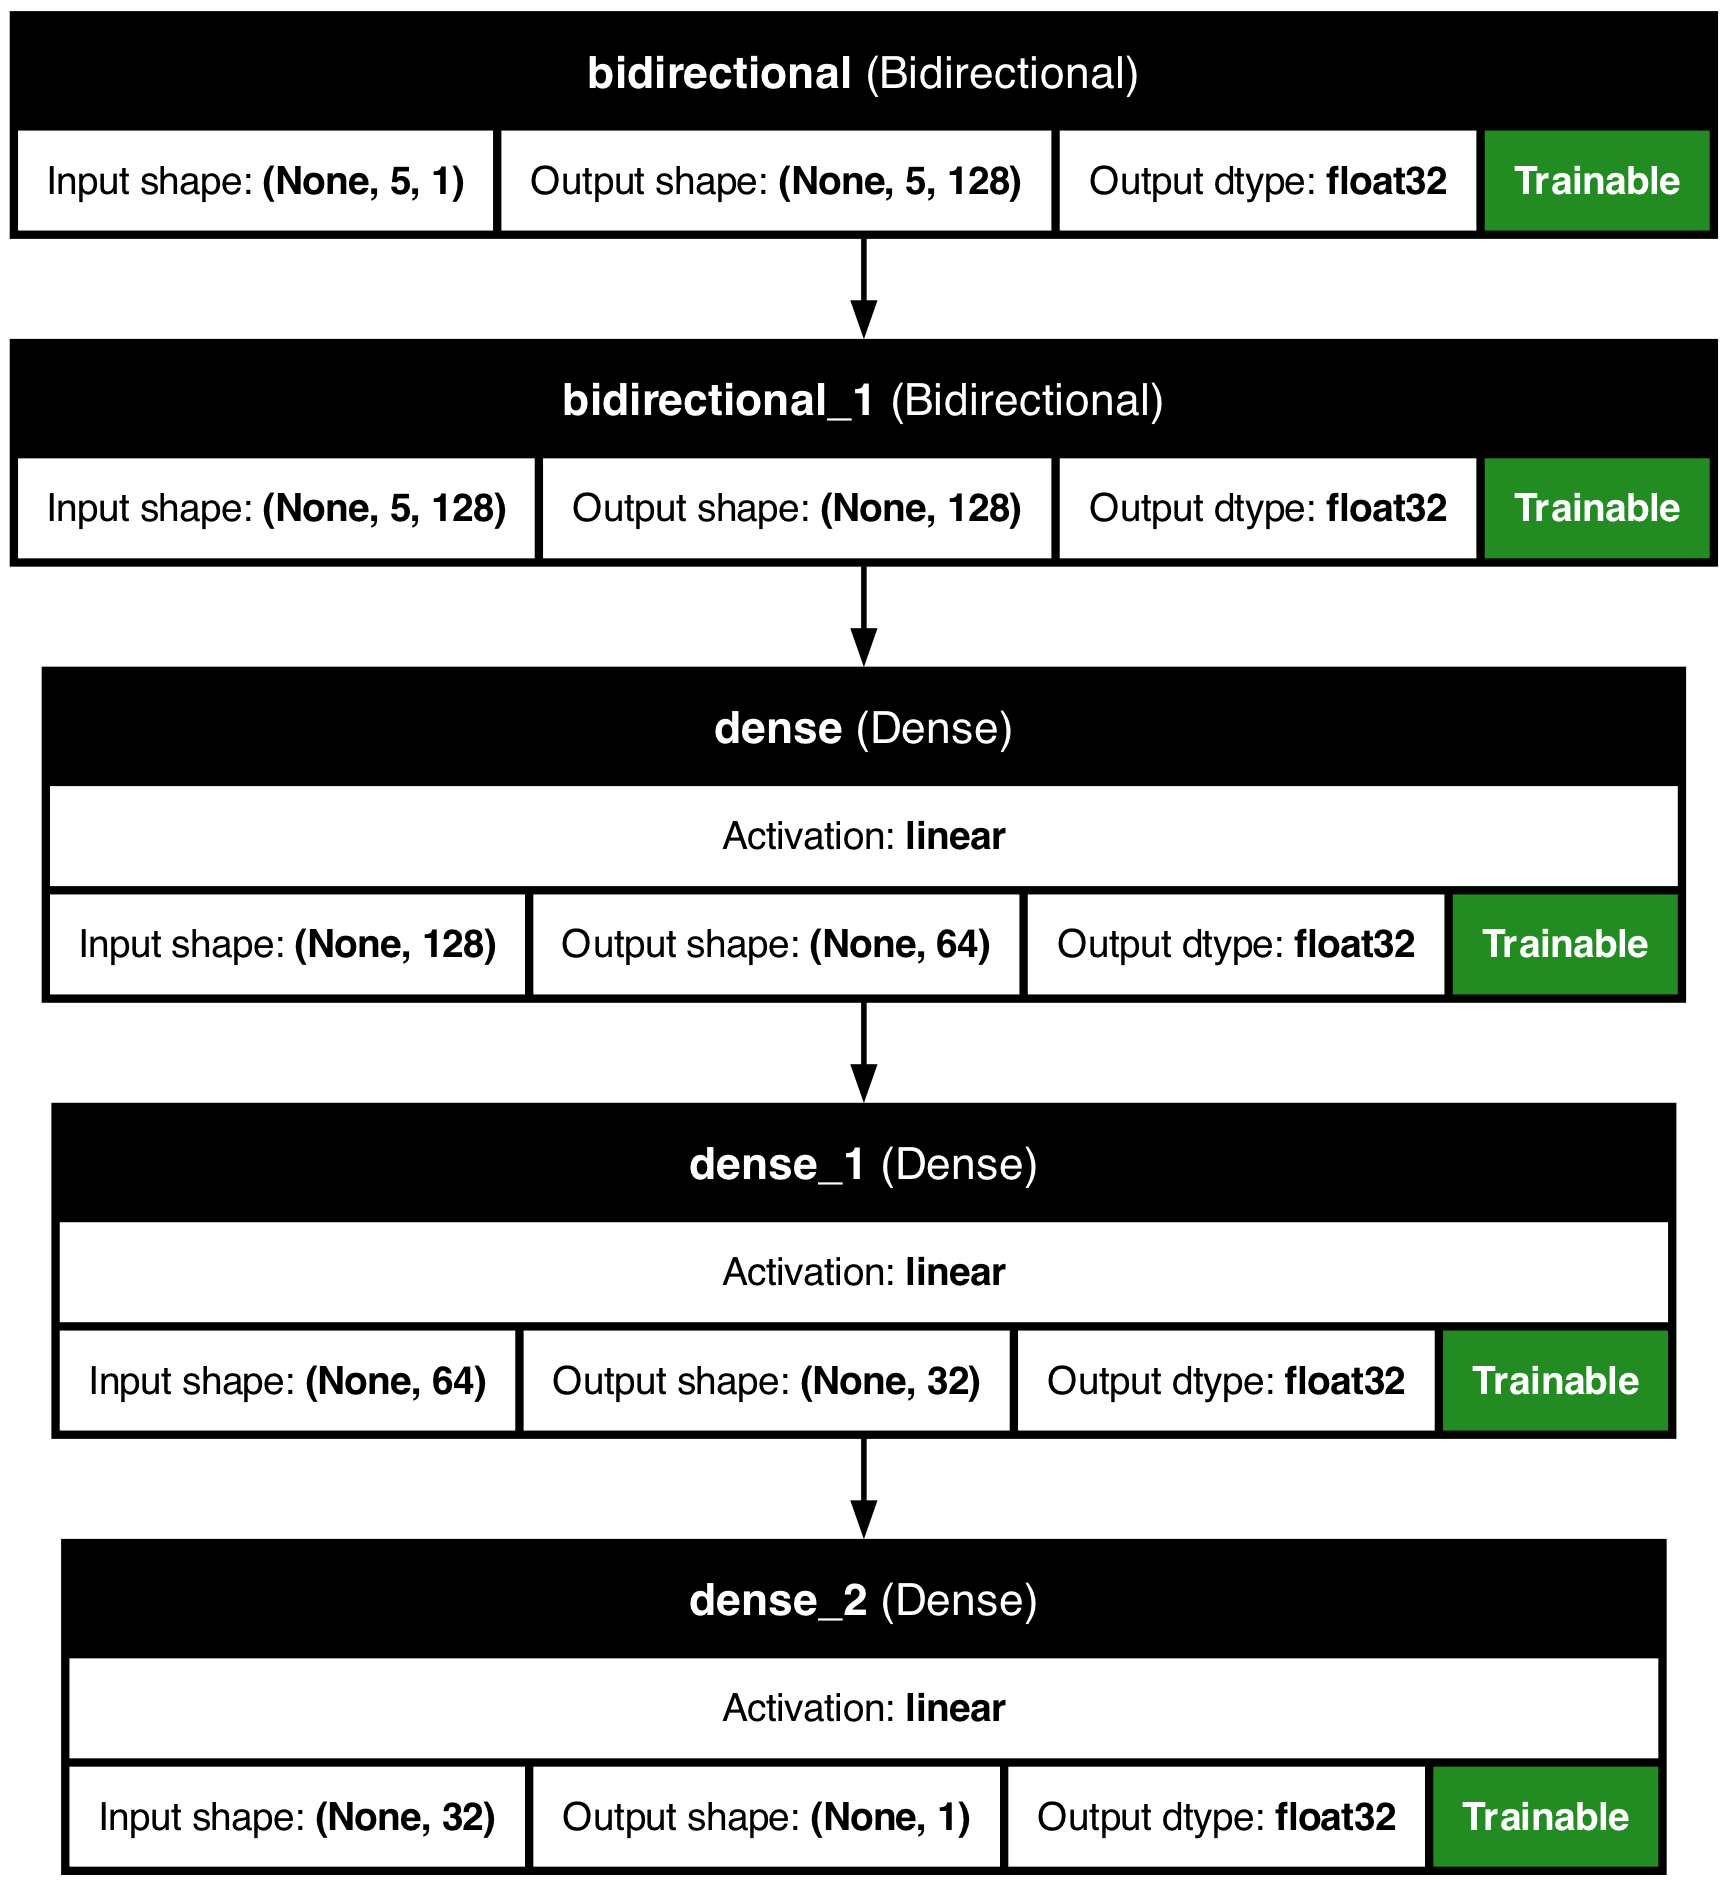

In [13]:
plot_model(
    gru,
    to_file="Images/gru_rnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [14]:
rnn_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/gru_rnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
rnn_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/gru_rnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/gru_rnn_logs"

rnn_csvlogger_callback = CSVLogger("../../../Logs/gru_rnn_logs/gru_rnn_logs.csv")
gru_history = gru.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[
        rnn_checkpoint_callback,
        rnn_tensorboard_callback,
        rnn_csvlogger_callback,
    ],
)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 13730.3125 - r2_score: -3.4673 - val_loss: 13761.3828 - val_r2_score: -5.5147
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 13355.6895 - r2_score: -3.3454 - val_loss: 13357.0293 - val_r2_score: -5.3233
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 12976.8096 - r2_score: -3.2221 - val_loss: 12943.5215 - val_r2_score: -5.1275
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 12589.6104 - r2_score: -3.0961 - val_loss: 12517.6035 - val_r2_score: -4.9259
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 12191.1133 - r2_score: -2.9665 - val_loss: 12077.5781 - val_r2_score: -4.7176
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 11779.8027 - r2_score: -2.8327 - val_loss: 11623.5850 - val_r2_score: -4.5027
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 11355.9023 - r2_score: -2.6947 - val_loss: 11157.2158 - val_r2_score: -4.2819
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179m

In [15]:
gru_train_loss = gru_history.history["loss"]
gru_train_acc = gru_history.history["r2_score"]
gru_val_loss = gru_history.history["val_loss"]
gru_val_acc = gru_history.history["val_r2_score"]


print("Training loss:", np.mean(gru_train_loss))
print("Validation loss:", np.mean(gru_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(gru_train_acc), np.std(gru_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(gru_val_acc), np.std(gru_val_acc))
)

Training loss: 1925.9932552397252
Validation loss: 1727.9184213758012
0.373360 Training accuracy with a standard deviation of 1.107579
0.181996 Validation accuracy with a standard deviation of 1.564164


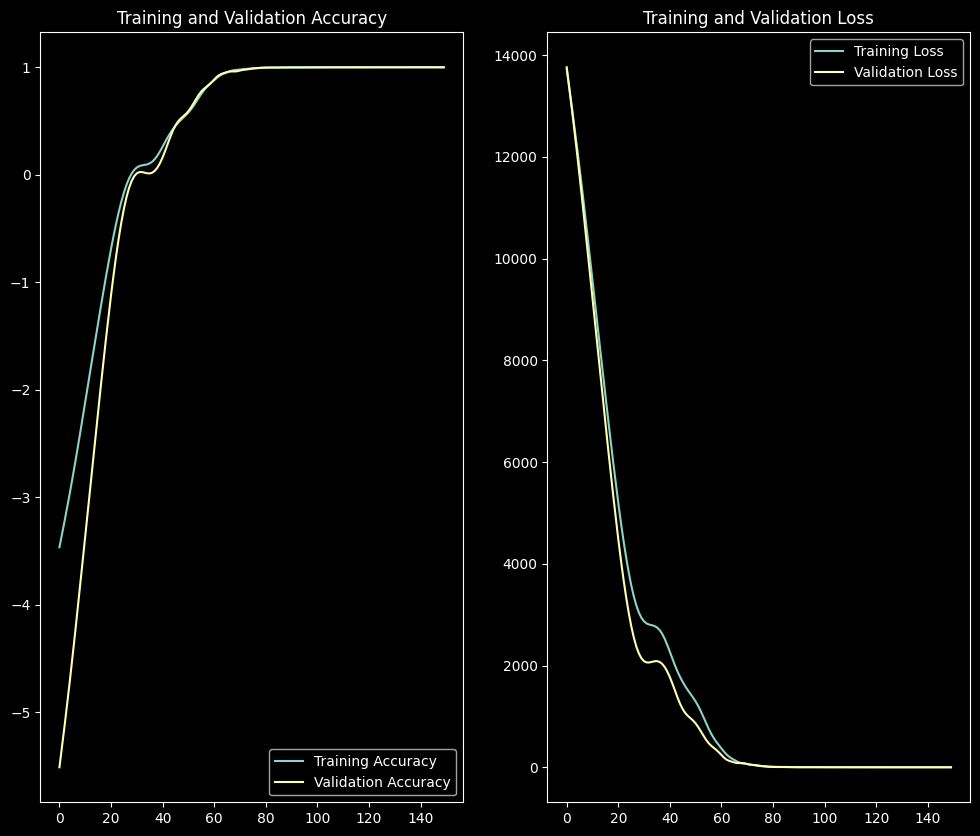

In [16]:
epochs_range = range(150)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, gru_train_acc, label="Training Accuracy")
plt.plot(epochs_range, gru_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, gru_train_loss, label="Training Loss")
plt.plot(epochs_range, gru_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/gru_acc_loss.png", bbox_inches="tight")

In [17]:
gru_test_loss, gru_test_accuracy = gru.evaluate(X_test, y_test)
print("Test loss:", gru_test_loss)
print("Test accuracy:", gru_test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4775 - r2_score: 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4775 - r2_score: 0.9999
Test loss: 0.47750529646873474
Test accuracy: 0.999864399433136


In [18]:
prediction = gru.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
